In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import datetime
# !pip install utide
#import utide

In [2]:
#S1: Trident Pier
#S2: Mayport
#S3: Lake Worth Pier
#S4: I-295 Buckman Bridge
#S5: Fernandina Beach
#S6: Daytona Beach Shores, Sunglow Pier (predictions only)

In [3]:
storm = 'Ian'

##### uncomment for met run #########
obs_dict = {
    'Trident Pier' : 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?product=water_level&application=NOS.COOPS.TAC.WL&begin_date=20220922&end_date=20221002&datum=NAVD&station=8721604&time_zone=gmt&units=metric&format=csv',
    'Mayport' : 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?product=water_level&application=NOS.COOPS.TAC.WL&begin_date=20220922&end_date=20221002&datum=NAVD&station=8720218&time_zone=gmt&units=metric&format=csv',
    'Lake Worth Pier' : 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?product=water_level&application=NOS.COOPS.TAC.WL&begin_date=20220922&end_date=20221002&datum=NAVD&station=8722670&time_zone=gmt&units=metric&format=csv',
    'I-295 Buckman Bridge' : 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?product=water_level&application=NOS.COOPS.TAC.WL&begin_date=20220922&end_date=20221002&datum=NAVD&station=8720357&time_zone=gmt&units=metric&format=csv',
    'Fernandina Beach' : 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?product=water_level&application=NOS.COOPS.TAC.WL&begin_date=20220922&end_date=20221002&datum=NAVD&station=8720030&time_zone=gmt&units=metric&format=csv'

           }
start_time = datetime.datetime.strptime('2022-09-22 18:00:00.00', '%Y-%m-%d %H:%M:%S.%f')

##### uncomment for tide spinup #########
# obs_dict = {
#     'Trident Pier' : 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?product=water_level&application=NOS.COOPS.TAC.WL&begin_date=20220902&end_date=20220922&datum=NAVD&station=8721604&time_zone=gmt&units=metric&format=csv',
#     'Mayport' : 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?product=water_level&application=NOS.COOPS.TAC.WL&begin_date=20220902&end_date=20220922&datum=NAVD&station=8720218&time_zone=gmt&units=metric&format=csv',
#     'Lake Worth Pier' : 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?product=water_level&application=NOS.COOPS.TAC.WL&begin_date=20220902&end_date=20220922&datum=NAVD&station=8722670&time_zone=gmt&units=metric&format=csv',
#     'I-295 Buckman Bridge' : 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?product=water_level&application=NOS.COOPS.TAC.WL&begin_date=20220902&end_date=20220922&datum=NAVD&station=8720357&time_zone=gmt&units=metric&format=csv',
#     'Fernandina Beach' : 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?product=water_level&application=NOS.COOPS.TAC.WL&begin_date=20220902&end_date=20220922&datum=NAVD&station=8720030&time_zone=gmt&units=metric&format=csv'

#            }
# start_time = datetime.datetime.strptime('2022-09-02 18:00:00.00', '%Y-%m-%d %H:%M:%S.%f')

preds_dict = {
   'Trident Pier' : 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?product=predictions&application=NOS.COOPS.TAC.WL&begin_date=20220902&end_date=20221002&datum=NAVD&station=8721604&time_zone=gmt&units=metric&interval=&format=csv',
   'Mayport' : 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?product=predictions&application=NOS.COOPS.TAC.WL&begin_date=20220902&end_date=20221002&datum=NAVD&station=8720218&time_zone=gmt&units=metric&interval=&format=csv',
   'Lake Worth Pier' : 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?product=predictions&application=NOS.COOPS.TAC.WL&begin_date=20220902&end_date=20221002&datum=NAVD&station=8722670&time_zone=gmt&units=metric&interval=&format=csv',
    'I-295 Buckman Bridge' : 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?product=predictions&application=NOS.COOPS.TAC.WL&begin_date=20220902&end_date=20221002&datum=NAVD&station=8720357&time_zone=gmt&units=metric&interval=&format=csv',
    'Fernandina Beach' : 'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?product=predictions&application=NOS.COOPS.TAC.WL&begin_date=20220902&end_date=20221002&datum=NAVD&station=8720030&time_zone=gmt&units=metric&interval=&format=csv'
            }

In [4]:
filename = 'fort.61'
name = filename.split('.')[0]

NSTA = 7 #number of recording stations (NSTAE = elevation stations, NSTAV = velocity stations)

station_names = ['Fernandina Beach', 'Mayport', 'I-295 Buckman Bridge', 'Trident Pier', 'Lake Worth Pier', "ID6", "ID7"] #Enter names of stations in order; verify this on fort.15

In [5]:
print(name)

fort


In [6]:
fort = list(csv.reader(open(filename, 'rt'), delimiter='\t'))

DTDP = 2 #ADCIRC timestep in seconds
NSPOOL = 600 #number of ADCIRC timesteps (DTDP) at which data is written to fort.61/62

time_delta = datetime.timedelta(0,NSPOOL*DTDP)

value_type = 'Water Surface Elevation' #string specifying either 'Water Surface Elevation' or 'Velocity' (case-sensitive)

if value_type == 'Water Surface Elevation':
  unit = 'm'

if value_type == 'Velocity':
  unit = 'm/s'

In [7]:
ET00_k = {}
TIME = []

for i in range(0, NSTA):
  ET00_k[str(station_names[i])] = []

In [8]:
i = 2
count = 0

while i < len(fort):

  time_header = fort[i][0]
  time = time_header[31:37]
  # time_elapsed = float(time) - initial_timestamp

  TIME.append(start_time + (time_delta * count))

  i += 1

  for j in range(0, NSTA):
    line = str(fort[i])
    value = line[16:34]
    ET00_k[str(station_names[j])].append(float(value))
    i += 1

  count += 1

In [9]:
print(ET00_k)

{'Fernandina Beach': [-0.13323420267, -0.043586331355, 0.048298073318, 0.13795087874, 0.2302860651, 0.32386427145, 0.41214882614, 0.48114390214, 0.53505445381, 0.57821411197, 0.60269253311, 0.61014118069, 0.60659004979, 0.59167293332, 0.56621551722, 0.53274731534, 0.49733672062, 0.41734759733, 0.3180631924, 0.22562978255, 0.15259834594, 0.13942169905, 0.1144519016, 0.073096814727, 0.032927587235, -0.011098919908, -0.091314672123, -0.16696826338, -0.2064021967, -0.26376442365, -0.36147797142, -0.44911595125, -0.51069488727, -0.55628615237, -0.57145400677, -0.55034938781, -0.55012369361, -0.53973891783, -0.45919524965, -0.3740469646, -0.32413617948, -0.2487139179, -0.12974154098, -0.048007416654, -0.0070713995499, 0.056523689079, 0.15958720029, 0.22302272544, 0.31451603607, 0.41890416763, 0.52617492001, 0.61597078284, 0.68541366314, 0.73132707689, 0.74675774233, 0.75116811904, 0.71700004362, 0.64574167553, 0.55253228424, 0.4438792737, 0.30462063101, 0.10458519212, -0.039987583168, -0.202

In [10]:
len(ET00_k['Trident Pier'])

612

In [11]:
print(len(TIME))
print(TIME)

612
[datetime.datetime(2022, 9, 22, 18, 0), datetime.datetime(2022, 9, 22, 18, 20), datetime.datetime(2022, 9, 22, 18, 40), datetime.datetime(2022, 9, 22, 19, 0), datetime.datetime(2022, 9, 22, 19, 20), datetime.datetime(2022, 9, 22, 19, 40), datetime.datetime(2022, 9, 22, 20, 0), datetime.datetime(2022, 9, 22, 20, 20), datetime.datetime(2022, 9, 22, 20, 40), datetime.datetime(2022, 9, 22, 21, 0), datetime.datetime(2022, 9, 22, 21, 20), datetime.datetime(2022, 9, 22, 21, 40), datetime.datetime(2022, 9, 22, 22, 0), datetime.datetime(2022, 9, 22, 22, 20), datetime.datetime(2022, 9, 22, 22, 40), datetime.datetime(2022, 9, 22, 23, 0), datetime.datetime(2022, 9, 22, 23, 20), datetime.datetime(2022, 9, 22, 23, 40), datetime.datetime(2022, 9, 23, 0, 0), datetime.datetime(2022, 9, 23, 0, 20), datetime.datetime(2022, 9, 23, 0, 40), datetime.datetime(2022, 9, 23, 1, 0), datetime.datetime(2022, 9, 23, 1, 20), datetime.datetime(2022, 9, 23, 1, 40), datetime.datetime(2022, 9, 23, 2, 0), datetime.da

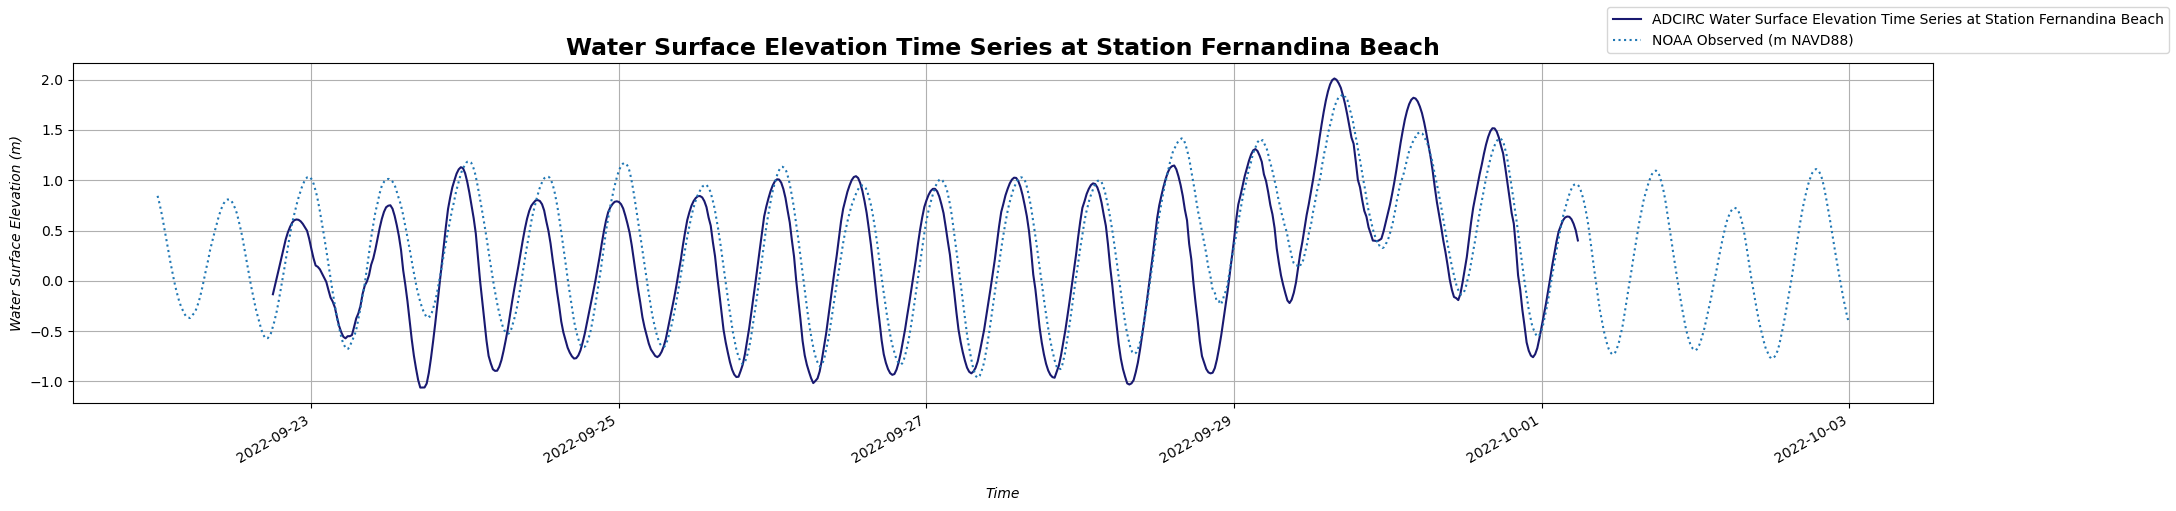

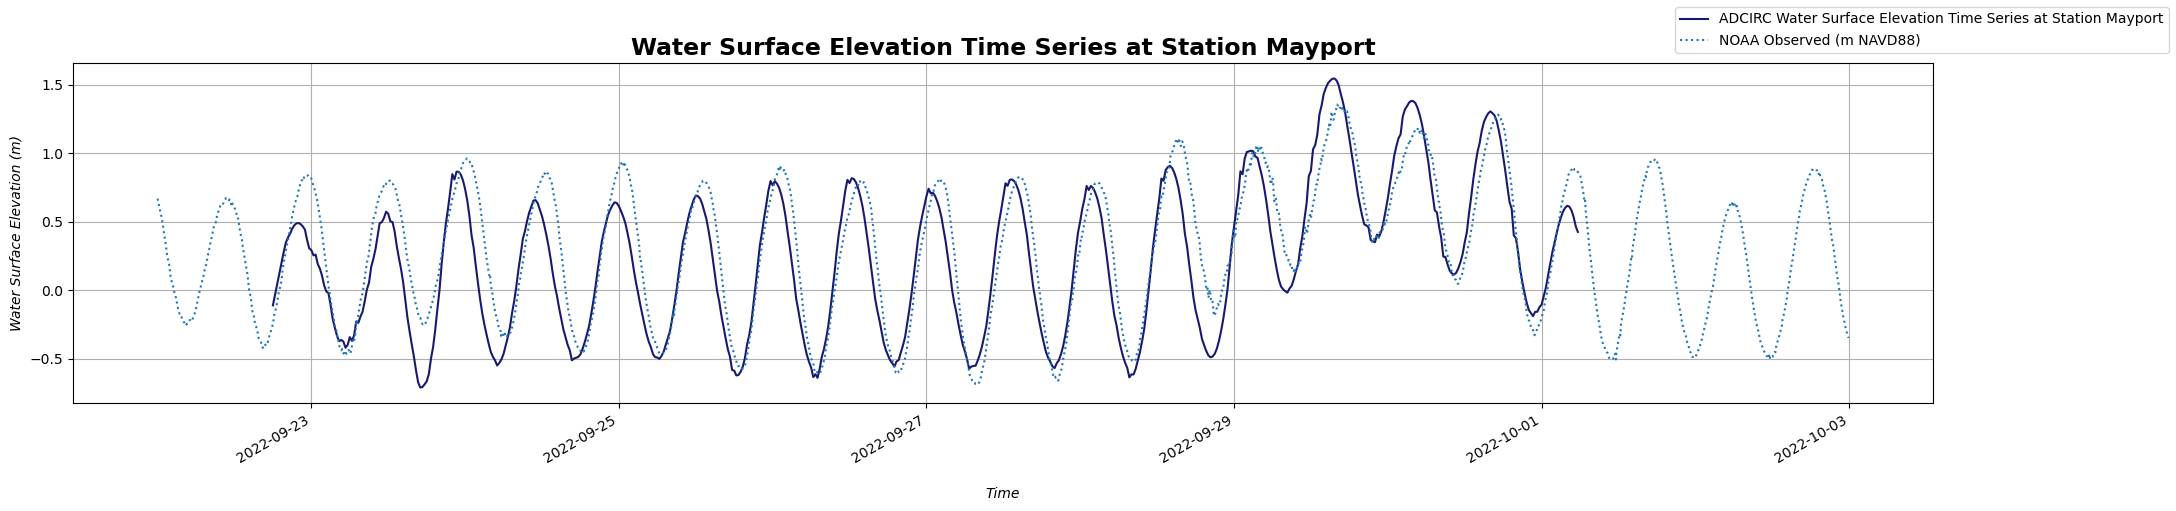

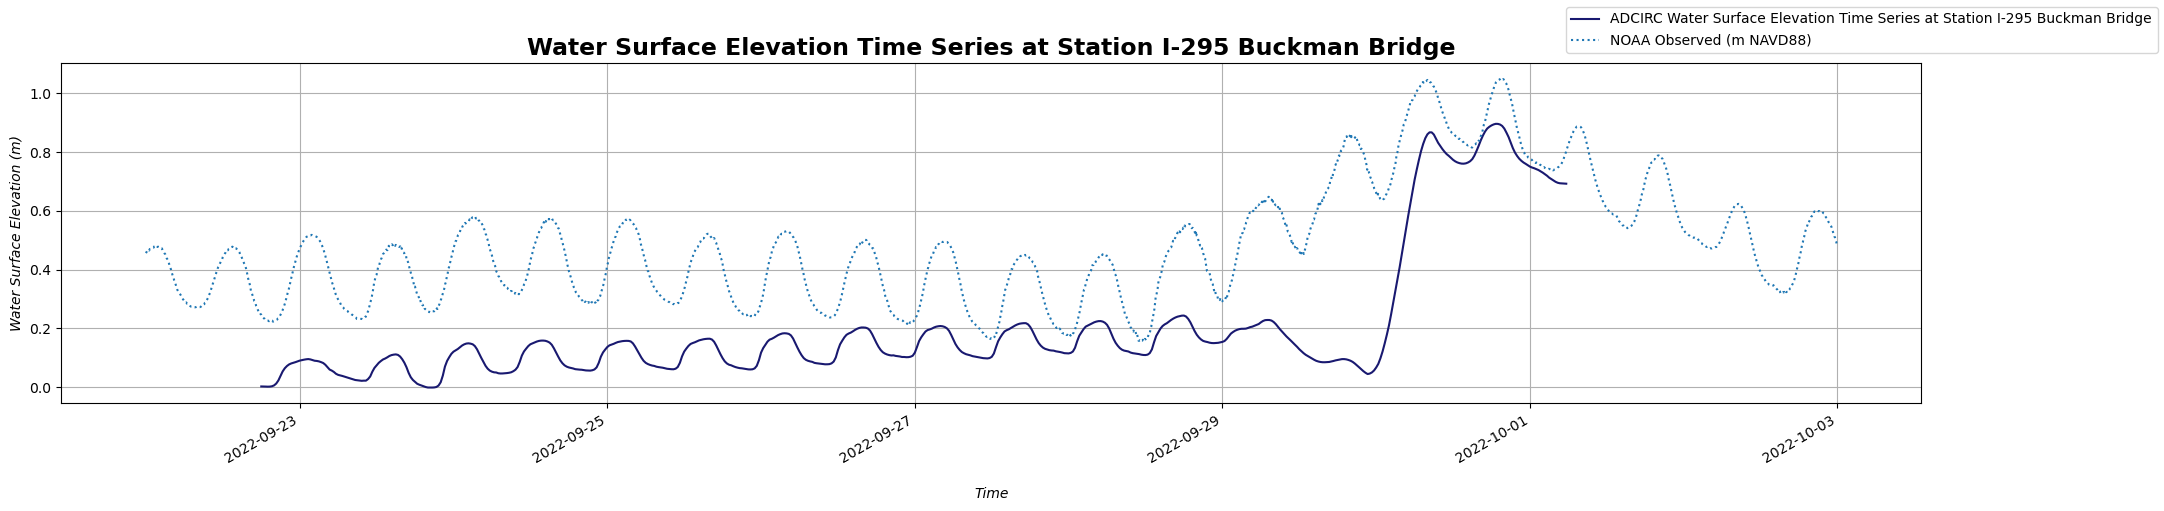

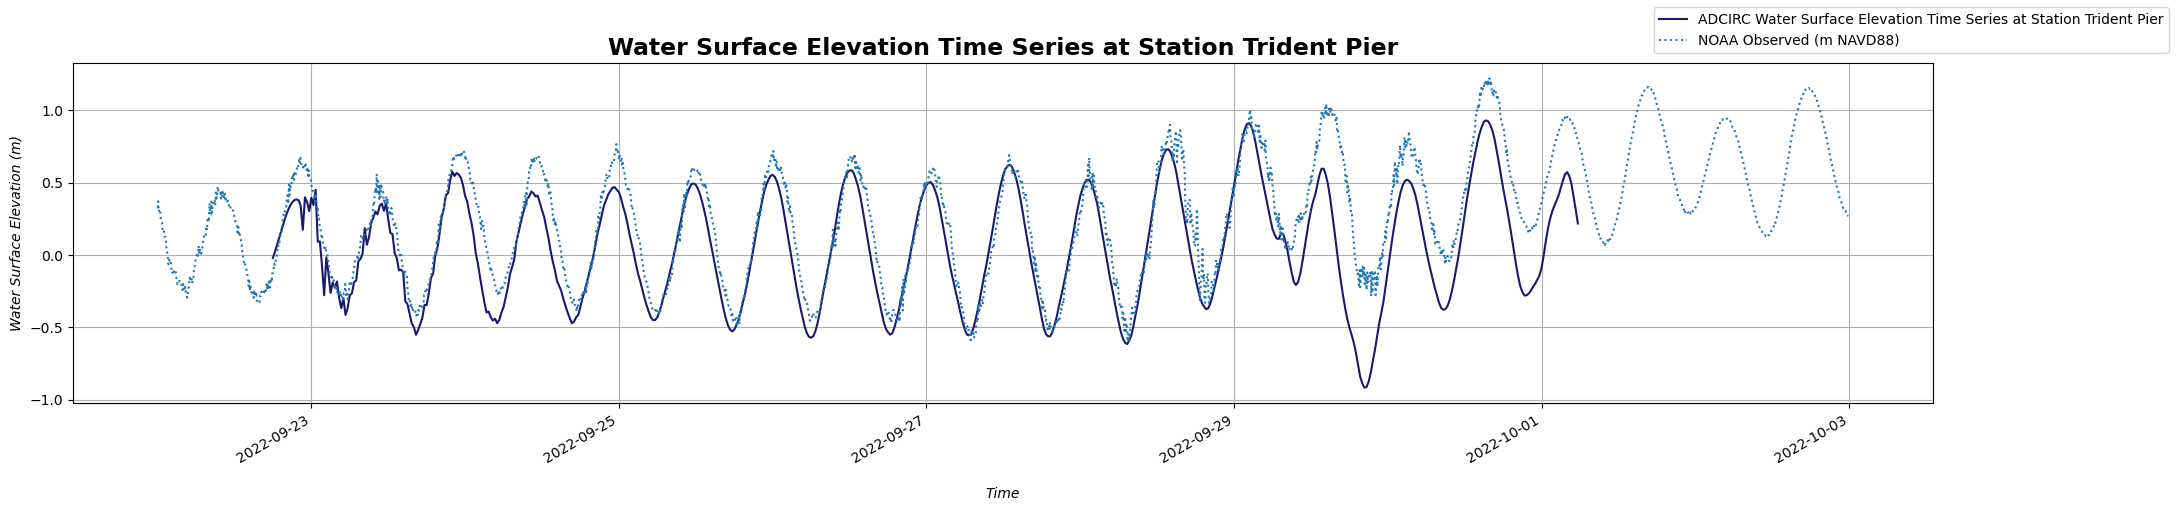

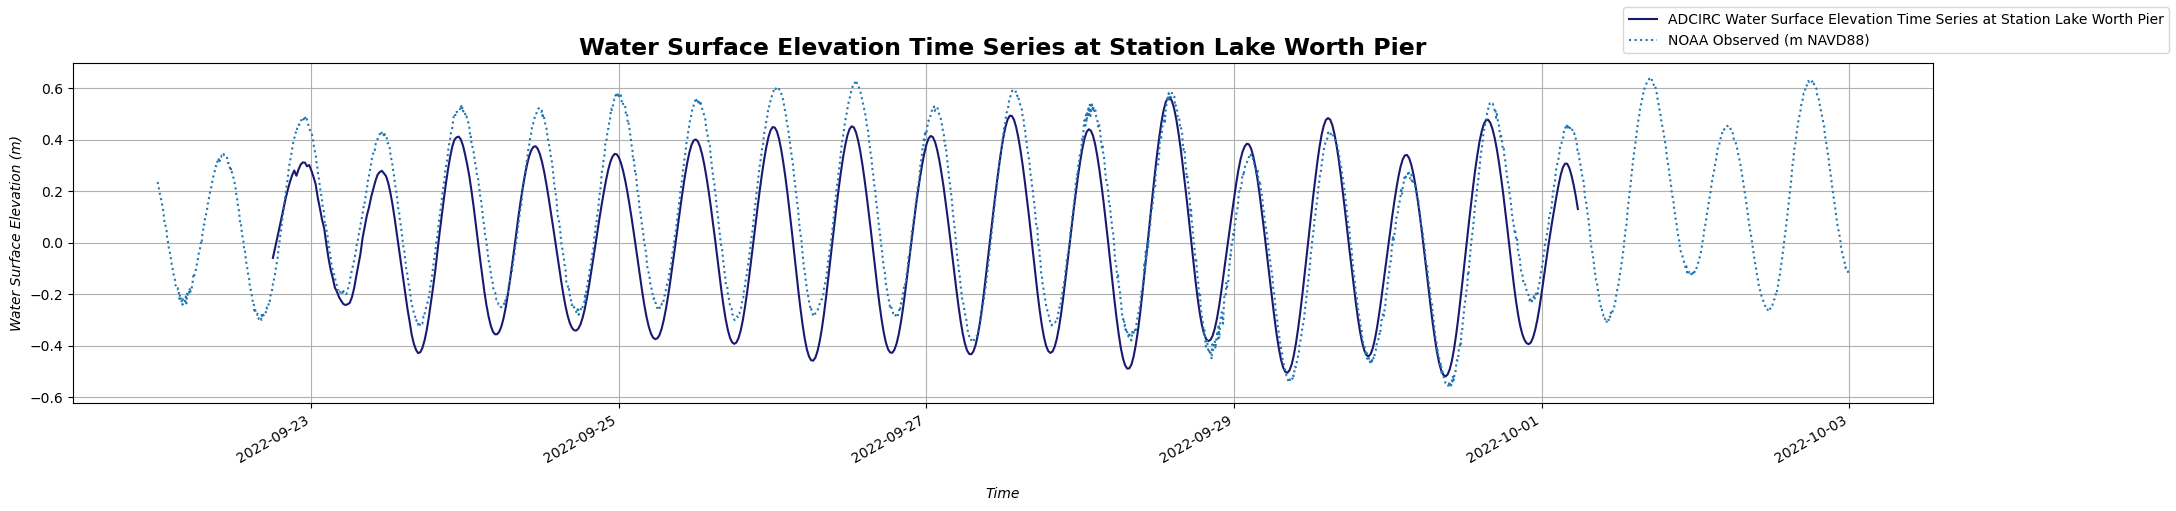

In [13]:
peak_val_adcirc = {}
peak_val_obs = {}

for i in range(0, NSTA-2):
  index_station = station_names[i];
  obs = pd.read_csv(obs_dict[index_station])
  index = pd.to_datetime(obs['Date Time'])
  obsm = obs.drop([' O or I (for verified)', ' F',' R', ' L', ' Quality '], axis='columns')
  obsm.index = index
  # preds = pd.read_csv(preds_dict[index_station])
  # index = pd.to_datetime(preds['Date Time'])
  # preds = preds.drop(['Date Time'], axis=1)
  # preds.index = index
  # coef = utide.solve(obs.index, obs[' Water Level'],
  #                   lat=28.5,
  #                   method='ols',
  #                   conf_int='MC',
  #                   verbose=False)

  # print(f'Station name: {station_names[i]}')
  # print(f'NOAA Predictions time: {index}')
  # print(f'NOAA Predictions data: {preds}')
  # print(f'ADCIRC time: {TIME}')
  # print(f'{len(TIME)} \n')
  # print(f'ADCIRC data: {ET00_k[index_station]}')
  # print(len(ET00_k[index_station]))
  # print('--------\n\n')



  fig, ax = plt.subplots(figsize=(24,5))

  index_station = station_names[i];
  ax.plot(TIME,ET00_k[index_station], label = f'ADCIRC {value_type} Time Series at Station {index_station}', linestyle = '-', color = 'midnightblue');
  ax.plot(index,obs[' Water Level'], linestyle = 'dotted', label="NOAA Observed (m NAVD88)")
  ax.set_title(f'{value_type} Time Series at Station {index_station}', fontstyle = 'normal', fontsize = 17, weight = 'bold');
  ax.set_xlabel('\nTime', fontstyle = 'oblique')
  ax.set_ylabel(f'{value_type} ({unit})', fontstyle = 'oblique')
  ax.grid(visible=None, which='both', axis='both')


  fig.autofmt_xdate()
  fig.legend()
  fig.savefig(f"{index_station}_met.png", dpi=600)

  #Track maxima to create plot similar to that on page 10 of Thomas et al., 2020
  #https://medium.com/@divagar_n/identifying-local-maxima-in-a-list-using-python-72f537d4ae20
  peak_val_adcirc[str(index_station)] = []

  peak_val_obs[str(index_station)] = []

  for i in range(1, len(ET00_k[index_station]) - 1):
    is_maxima = ET00_k[index_station][i] > ET00_k[index_station][i-1] and ET00_k[index_station][i] > ET00_k[index_station][i+1] and ET00_k[index_station][i] > 0

    if is_maxima == True:
      peak_val_adcirc[str(index_station)].append(ET00_k[index_station][i])

      try:
        peak_val_obs[str(index_station)].append(obsm.loc[str(TIME[i])][' Water Level'])
      except:
        peak_val_obs[str(index_station)].append('NaN')

    # peak_val_adcirc_logic[str(index_station)].append(is_maxima)



In [66]:
# obsm.loc['2022-10-24 00:00:00'][' Water Level']

In [14]:
# delete_variable = TIME[i]
# obsm.iloc
# obsm[' Water Level'][5]

In [15]:
# len(peak_val_adcirc['Trident Pier'])

In [16]:
# delete_variable = zip(peak_val_obs['Trident Pier'], peak_val_adcirc['Trident Pier'])

In [17]:
# print(list(delete_variable))

In [18]:
# plt.scatter(str(peak_val_obs['Trident Pier']), str(peak_val_adcirc['Trident Pier']))